# Cactus plots

Plus d'information dans le README du dossier [courant](./).

## Imports nécessaires

In [1]:
from metrics.wallet import *
from common import *
import matplotlib.pyplot as plt

## Constantes locales

In [2]:
COLOR_MAP = {
    '$\\mathtt{PER}(\\mathcal{H}^{\\mathtt{r,dom/ddeg}}, \\mathcal{B}^\\mathtt{SP_{30\\%}})$': '#ff7f0e',
    '$\\mathtt{PER}(\\mathcal{H}^{\\mathtt{r,ibs}}, \\mathcal{B}^\\mathtt{SP_{60\\%}})$': '#ff7f0e',
    '$\\mathtt{PER}(\\mathcal{H}^{\\mathtt{r,\\mathtt{dom/wdeg}^{chs}}}, \\mathcal{B}^\\mathtt{SP_{20\\%}})$': '#ff7f0e',
    '$\\mathtt{PER}(\\mathcal{H}^{\\mathtt{r,wdeg^\\mathtt{ca.cd}}}, \\mathcal{B}^\\mathtt{SP_{30\\%}})$': '#ff7f0e',
    '$\\mathtt{PER}(\\mathcal{H}^{\\mathtt{r,abs}}, \\mathcal{B}^\\mathtt{SP_{30\\%}})$': '#ff7f0e',
    '$\\mathtt{EQ^{30\\%}(dom/ddeg)}$': '#2ca02c',
    '$\\mathtt{EQ^{30\\%}(\\mathtt{dom/wdeg}^{chs})}$': '#2ca02c',
    '$\\mathtt{prob(wdeg^\\mathtt{ca.cd})}$': '#d62728',
    '$\\mathtt{EQ^{30\\%}(abs)}$': '#2ca02c',
    '$\\mathtt{EQ^{30\\%}(wdeg^\\mathtt{ca.cd})}$': '#2ca02c',
    '$\\mathtt{EQ^{0\\%}(dom/ddeg)}$': '#9467bd',
    '$\\mathtt{prob(\\mathtt{dom/wdeg}^{chs})}$': '#d62728',
    '$\\mathtt{prob(dom/ddeg)}$': '#d62728',
    '$\\mathtt{EQ^{0\\%}(\\mathtt{dom/wdeg}^{chs})}$': '#9467bd',
    '$\\mathtt{EQ^{0\\%}(wdeg^\\mathtt{ca.cd})}$': '#9467bd',
    '$\\mathtt{prob(ibs)}$': '#d62728',
    '$\\mathtt{EQ^{0\\%}(abs)}$': '#9467bd',
    '$\\mathtt{EQ^{0\\%}(ibs)}$': '#9467bd',
    '$\\mathtt{EQ^{30\\%}(ibs)}$': '#2ca02c',
    '$\\mathtt{prob(abs)}$': '#d62728'
}

## Analyse importée!

In [3]:
analysis = import_analysis_from_file(ANALYSIS_07_MERGE)

In [4]:
def f(x):
    Y = ['cacd', 'impact', 'activity', 'chs', 'ddegondom']
    for y in Y:
        if y in x:
            return y
    
    return 'ddegondom' if x == 'domddeg' else None

analysis = analysis.add_variable(
    'h',
    lambda x: f(x['old_experiment_ware'])
)

activity


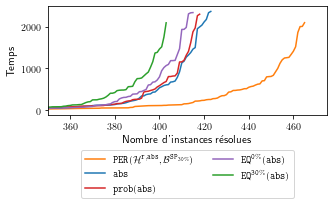

cacd


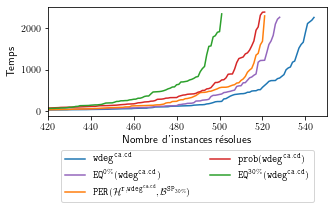

chs


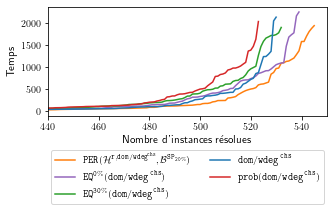

ddegondom


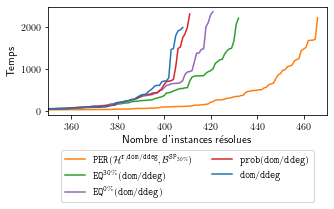

impact


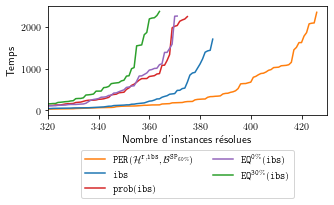

In [7]:
size = {
    'activity': (350, 475),
    'cacd': (420, 550),
    'chs': (440, 550),
    'ddegondom': (350, 470),
    'impact': (320, 430),
}

for sub in analysis.groupby('h'):
    h = sub.data_frame.h.unique()[0]
    print(h)
    
    sub.cactus_plot(
        # Cactus plot specificities
        cumulated=False,
        cactus_col='cpu_time',
        show_marker=False,

        # Figure size
        figure_size=(5, 2),

        # Titles
        title='',
        x_axis_name='Nombre d\'instances résolues',
        y_axis_name='Temps',

        # Axis limits
        x_min=size[h][0],
        x_max=size[h][1],
        y_min=None,
        y_max=None,

        # Axis scaling
        logx=False,
        logy=False,

        # Legend parameters
        legend_location=Position.BOTTOM,
        legend_offset=(0, -0.17),
        ncol_legend=2,

        # Style mapping
        color_map=COLOR_MAP,
        #style_map=R_STYLE_MAP,

        # Title font styles
        #title_font_name='Times New Roman',
        title_font_color='#000000',
        title_font_size=11,
        title_font_weight=FontWeight.BOLD,

        # Label font styles
        #label_font_name='Times New Roman',
        label_font_color='#000000',
        label_font_size=11,
        label_font_weight=FontWeight.BOLD,

        # Others
        latex_writing=True,
        output=f"fig/2A-{h}.pdf",
        dynamic=False
    )
    plt.show()
    